<!-- <img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px"></center> -->


<hr style="border-width:2px;border-color:#75DFC1"></center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Plotly-logo-01-square.png/1200px-Plotly-logo-01-square.png" style="height:150px">


<hr style="border-width:2px;border-color:#75DFC1">

> Dans cet atelier carrière, nous allons découvrir un nouvel outil de visualisation en Python.
> La bibliothèque **`Plotly`** permet de réaliser des visualisations beaucoup plus interactives qu'avec **`Matplotlib`** ou **`Seaborn`**.

>**Documentation Plotly :** https://plotly.com/
>
> Dans un premier temps, nous allons importer les différents Packages nécessaires à l'exercice.

In [1]:
## Insérez votre code ici



In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go


* Lire le ficher **`timesData`** dans un **`DataFrame`** nommé **`df`**
* Affichez les première lignes ainsi que les informations de **`df`**

In [3]:
## Insérez votre code ici


In [2]:
df=pd.read_csv('university_rank.csv')
df.head()

world_rank                        university_name                   country  \
0          1                     Harvard University  United States of America   
1          2     California Institute of Technology  United States of America   
2          3  Massachusetts Institute of Technology  United States of America   
3          4                    Stanford University  United States of America   
4          5                   Princeton University  United States of America   

   teaching international  research  citations income total_score  \
0      99.7          72.4      98.7       98.8   34.5        96.1   
1      97.7          54.6      98.0       99.9   83.7        96.0   
2      97.8          82.3      91.4       99.9   87.5        95.6   
3      98.3          29.5      98.1       99.2   64.3        94.3   
4      90.9          70.3      95.4       99.9      -        94.2   

  num_students  student_staff_ratio international_students female_male_ratio  \
0       20,152                  8.9                    25%               NaN   
1        2,243                  6.9                    27%           33 : 67   
2       11,074                  9.0                    33%           37 : 63   
3       15,596                  7.8                    22%           42 : 58   
4        7,929                  8.4                    27%           45 : 55   

   year  
0  2011  
1  2011  
2  2011  
3  2011  
4  2011

* Affichez les informations de **`df`**

In [5]:
## Insérez votre code ici



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

## Scatter
>
> Nous allons ici tracer deux graphiques en un.
>
> Un premier sur la relation entre le rang mondial et le score de 'citations' de chaque Université et l'autre sur la relation entre le rang mondial et le score de 'teaching' de chaque université.
>
> Pour cela, on prendra les 10 premières lignes du **`DataFrame`** sur l'année 2014.

In [4]:
## Insérez votre code ici
data = df[df.year == 2014].iloc[:10,:]




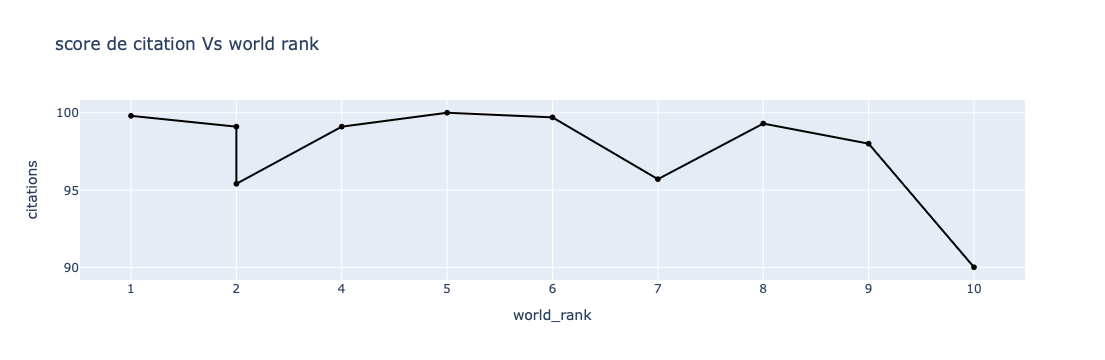

In [5]:
fig = go.Figure()

trace = go.Scatter(x = data.world_rank,
                  y = data.citations,
                  text = data.university_name,
                  mode = "lines+markers",
                  marker = dict(color = "black"))

fig.add_trace(trace)

fig.update_layout(title = "score de citation Vs world rank",
                 xaxis_title = "world_rank",
                 yaxis_title = "citations")

fig.show()

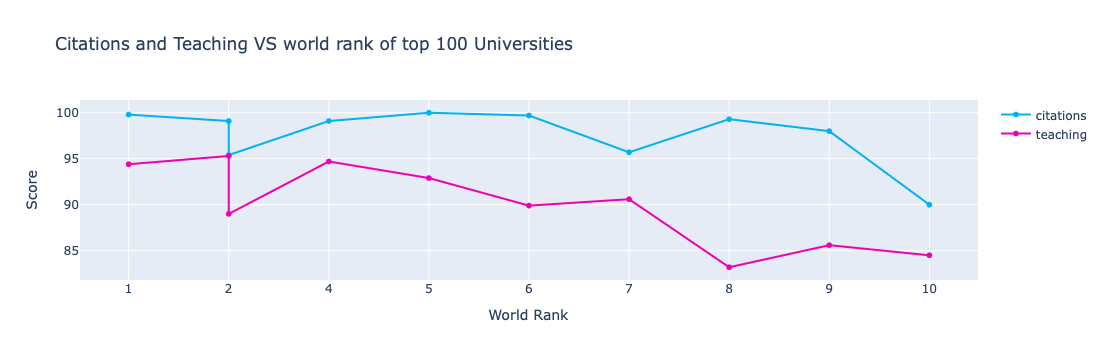

In [6]:
fig = go.Figure()

## Trace

fig.add_trace(go.Scatter(x = data.world_rank, # vble 'world_rank'
                    y = data.citations,  # vble 'citations'
                    mode = "lines+markers", # Type de laison --> Lignes + Marqueurs 
                    name = "citations",     # Label
                    marker = dict(color='#00b2ee'), # Couleur 
                    text= data.university_name) # Curseur avec la vble 'university_name'
             )

fig.add_trace(go.Scatter(
                  x = data.world_rank, # vble 'world_rank'
                  y = data.teaching,   # vble 'teaching'
                  mode = "lines+markers", # Type de laison --> Lignes + Marqueurs 
                  name = "teaching",   # Label
                  marker = dict(color = '#ee00b2'),  # Couleur 
                  text= data.university_name)  # Curseur avec la vble 'university_name'
             )



# Le layout permet d'ajouter une légende, de modifier les axes ...
fig.update_layout(title = 'Citations and Teaching VS world rank of top 100 Universities',
              xaxis_title= 'World Rank',
              yaxis_title= 'Score')


# On l'affiche 
fig.show()

> On peut remarquer ici, que certaines Universités bien qu'ayant un bon score de 'teaching', n'ont pas de bons scores de 'citations'.

## Bar Charts

In [9]:
## Insérez votre code ici



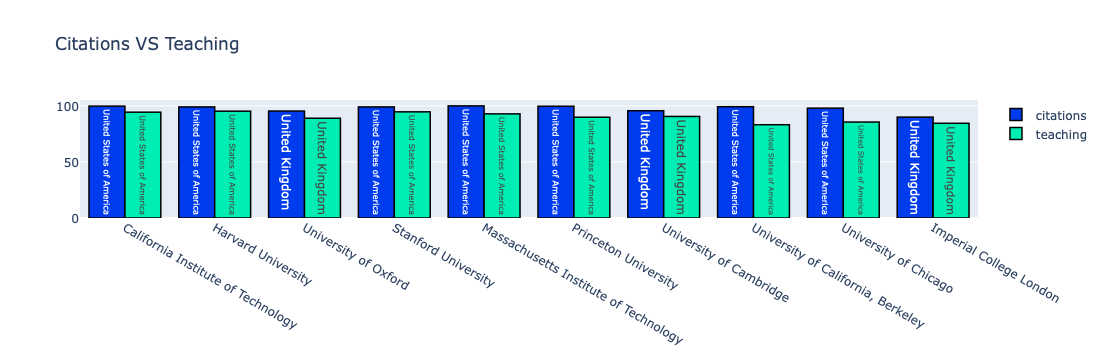

In [7]:
# Graphes 
trace_3 = go.Bar(
                x = data.university_name, # vble 'university_name'
                y = data.citations, # vble 'citations '
                name = "citations", # Label
                marker = dict(color = '#003bee',
                             line=dict(color='black',width=1.5)),
                text = data.country) 

trace_4 = go.Bar(
                x = data.university_name,
                y = data.teaching,
                name = "teaching",
                marker = dict(color = '#00eeb3',
                              line=dict(color='black',width=1.5)),
                text = data.country)

# Data
data_2 = [trace_3, trace_4] 

# Layout 
layout_2 = go.Layout(barmode = "group",title='Citations VS Teaching') # Centrées / côte à côte 

# Création de la figure 
fig_2 = go.Figure(data = data_2, layout = layout_2)

# Affichage de la figure 
fig_2.show()

## Mutiple subplots
>
> Il est également possible d'afficher plusieurs graphes en même temps. Nous allons ici tracer les 4 graphes du dessus.

In [11]:
## Insérez votre code ici



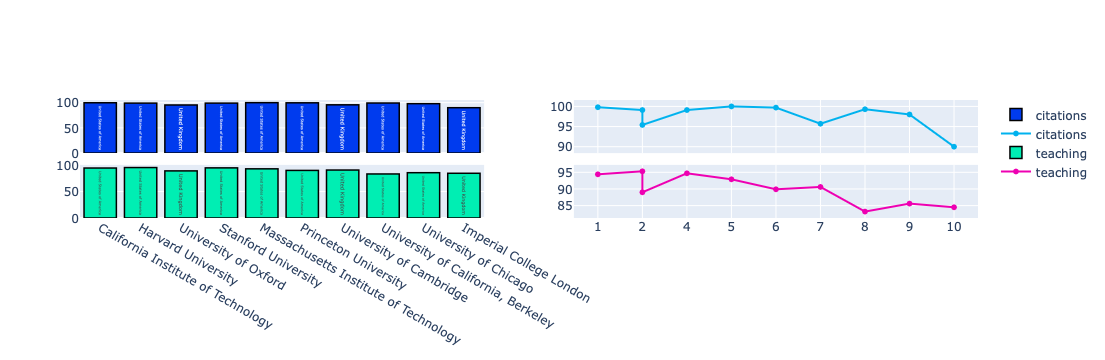

In [8]:
from plotly import subplots

trace_1 = go.Scatter(x = data.world_rank, # vble 'world_rank'
                    y = data.citations,  # vble 'citations'
                    mode = "lines+markers", # Type de laison --> Lignes + Marqueurs 
                    name = "citations",     # Label
                    marker = dict(color='#00b2ee'), # Couleur 
                    text= data.university_name) # Curseur avec la vble 'university_name'

trace_2 = go.Scatter(
                  x = data.world_rank, # vble 'world_rank'
                  y = data.teaching,   # vble 'teaching'
                  mode = "lines+markers", # Type de laison --> Lignes + Marqueurs 
                  name = "teaching",   # Label
                  marker = dict(color = '#ee00b2'),  # Couleur 
                  text= data.university_name)  # Curseur avec la vble 'university_name'


# Creating two subplots
fig_3 = subplots.make_subplots(rows=2, cols=2, shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.1,horizontal_spacing=0.1) #shared_yaxes=False/
                                                                                          # Format specs
                                                                                          # Vertical et horizontal spacind
# Ajout des graphes à la figure 

fig_3.append_trace(trace_3, 1, 1)
fig_3.append_trace(trace_1, 1, 2)
fig_3.append_trace(trace_4, 2, 1)
fig_3.append_trace(trace_2, 2, 2)

fig_3.show()

## Pie Charts
>
> Nous allons à présent afficher les pourcentages d'élèves dans chaque Univsersité pour l'année 2014.

In [13]:
## Insérez votre code ici



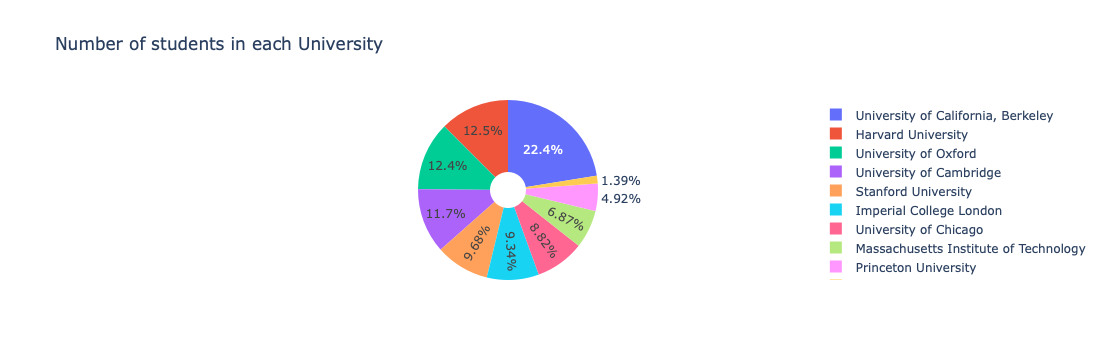

In [9]:
# data preparation
pie1 = data.num_students
pie1_list = [float(each.replace(',', '.')) for each in data.num_students]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = data.university_name


# figure
trace_5= go.Pie(labels=labels,values=pie1_list,hole = 0.2)  

# Layout

layout_3=go.Layout(title='Number of students in each University')

# Figure
fig_4 = go.Figure(data=trace_5,layout=layout_3)
fig_4.show()

## Boxplots
>
> Nous allons à présent tracer les différents boxplot du **'total_score'** des Universités de 2011 à 2017

In [15]:
## Insérez votre code ici



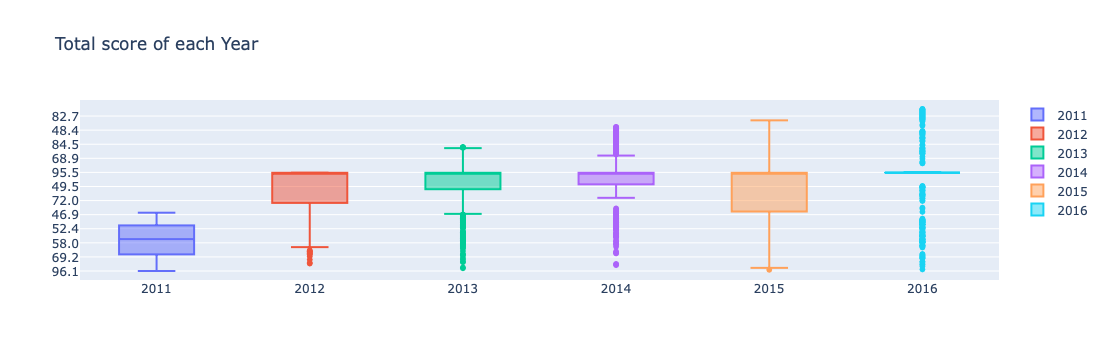

In [10]:
years=np.arange(2011,2017,1)


data_years=df[df.year.isin(years)]


data_3=[]

for i in years:
    trace_6=go.Box(y=df[df.year==i].total_score, x = df[df.year==i].year, name = str(i))
    data_3.append(trace_6)

layout_3 = go.Layout(title = 'Total score of each Year')
fig_5=go.Figure(data=data_3,layout=layout_3)
fig_5.show()

# Custom buttons 
> Pour ajouter plus d'interaction aux graphiques, Plotly permet de rajouter des sliders et des boutons pour rendre les graphes plus dynamiques.
> 
> Les méthodes possibles pour modifier les graphes avec plotly:
>> **Restyle** : Permet de modifier les données (rendre des données visible ou non,changer les types de graphes...)
>>
>> **Relayout** : Permet de modifier le layout (ajouter des annotations, des [formes](https://plotly.com/python/shapes/)...)
>>
>> **Update** : Combinaison entre les deux méthodes précédentes.
>>
>> **Animate** : Créer des [animations](https://plotly.com/python/animations/#animated-figures-with-graph-objects)
>
> Pour ajouter des boutons personalisés permettant de visualiser différents types de graphes on fixe le paramètre **updatemenus** de la méthode **update_layout**.
>
> **upadatemenus** prend en argument une liste de dictionnaire, chaque dictionnaire contenant :
>> 
>> le **type** d'affichage des boutons :
>>> **"dropdown"** : les boutons sont accessible via un menu. 
>>>
>>> **"buttons"** : les boutons sont tous affichés horizentalement ou verticalement.
>>
>> La **direction** : Déterminer la direction d'apparition des boutons soit dans le menu dropdown, soit quant ils sont affiché en colonne ( "left","right","up","down" ).
>> 
>> **buttons** : liste de dictionnaire, chaque dictionnaire ayant comme clés :
>>> **method** = la méthode a utiliser lorsqu'on clique sur le bouton ( "restyle", "relayout", "animate", "update" ).
>>>
>>> **args** = liste des arguments à passer à la méthode plotly (renseigné dans **method**) lorsqu'on clique sur le bouton.
>>>
>>> **label** = Texte à afficher dans le bouton.
>>
>> **x** et **y** : pour positionner le bouton selon l'axe des x et des y, prennent des valeurs entre -2 et 3.
>>
> Trouver [ici](https://plotly.com/python/custom-buttons/) la documentation pour ajouter des boutons.


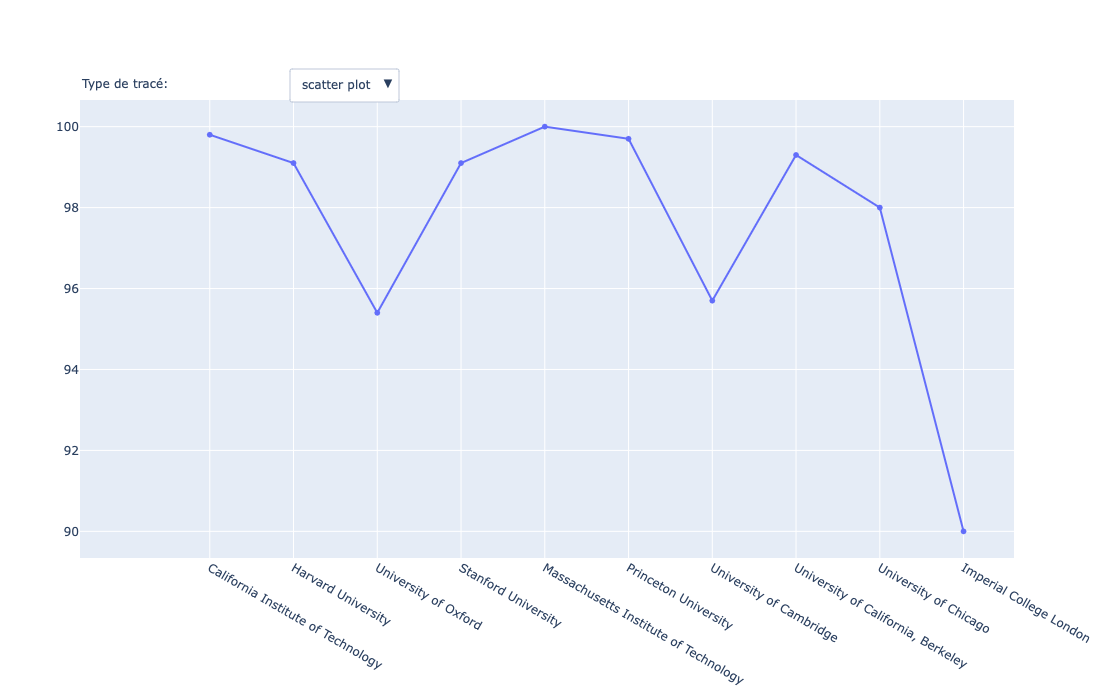

In [11]:

# Créer la figure 
fig = go.Figure()

# Ajouter le premier tracée
fig.add_trace(go.Scatter(y = data['citations'], x = data['university_name']))

# Régler la taille de la figure 
fig.update_layout(autosize = False,
                 width = 800, # Largeur de la figure
                 height = 700)# Longeur de la figure

# Ajouter les boutons 
fig.update_layout(updatemenus = [dict( type = "dropdown", # Affichage des boutons
                                     direction = "down", # direction d'affichage des boutons
                                     buttons = list([
                                         dict(args = ["type","scatter"], # Type de plot 1
                                             label = "scatter plot",
                                             method = "restyle"),
                                         dict(args = ["type","bar"], # Type de plot 2
                                             label = "bar chart",
                                             method = "restyle")
                                     ]),
                                     x = 0.34,
                                     y = 1.07,
                                     )])
# Ajouter des annotations
fig.add_annotation(text="Type de tracé:",
             showarrow=False,
             x=-1, 
             y=1.06, 
             yref="paper"
)

fig.show()

## Graphes avec sliders
>
> Il est également possible d'insérer des sliders avec Plotly. Par souci de syntaxe, nous utiliserons ici Ploty.express qui permet de réaliser les mêmes graphes que Plotly.graph_objects mais de manière plus simple.
>
* Dans un premier temps, importez **`plotly.express as px`**
* Chargez le dataset gapminder()
* Affichez les premières lignes du dataset.



In [18]:
## Insérez votre code ici 

In [12]:
import plotly.express as px

df_new = px.data.gapminder()

df_new.head()



country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

* Affichons, par année le PIB brut par habitant en fonction de l'esperence de vie.

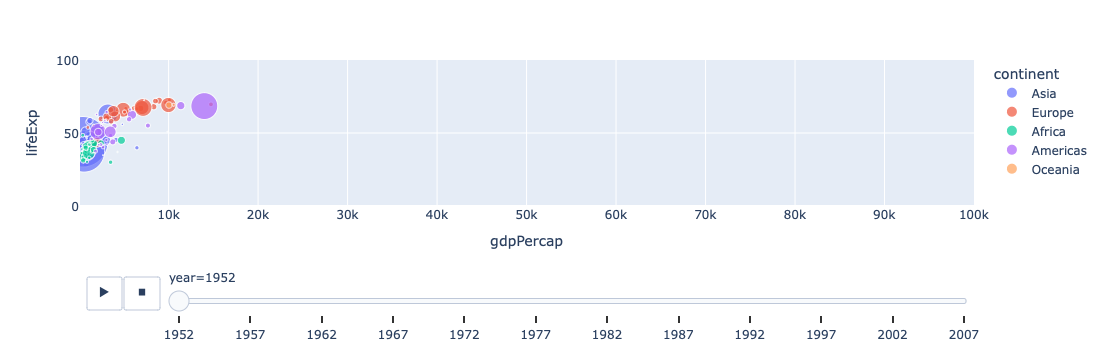

In [14]:
fig = px.scatter(df_new, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country", color="continent",
                 
                 log_x=False,hover_name="country",size='pop', size_max=55, range_x=[100,100000], range_y=[0,100])


fig.show()